In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats.stats import pearsonr
import graphlab
from sklearn.cross_validation import train_test_split
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds
%matplotlib inline

In [2]:
df = pd.read_csv("processed_data.csv")

In [3]:
reg = df[df["user_review_count"] > 2]
reg.shape

(47583, 36)

In [4]:
n_users = reg.userid.nunique()
n_items = reg.course_id.nunique()

In [67]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
validate_df = pd.read_csv("validation.csv")

In [68]:
train_df = train_df[["new_course_id", "new_user_id", "rating"]]
validate_df = validate_df[["new_course_id", "new_user_id", "rating"]]
test_df = test_df[["new_course_id", "new_user_id", "rating"]]

In [69]:
sf_train = graphlab.SFrame(train_df)
sf_validation = graphlab.SFrame(validate_df)
sf_test = graphlab.SFrame(test_df)

In [71]:
predictions_train_dic = {}
predictions_valid_dic = {}

for i in xrange(4, 20, 2):
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.042721s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 4        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 75us         | NA                     |

+---------+--------------+------------------------+

| 0       | 46.99ms      | 0.286842               |

| 1       | 88.339ms     | 0.07896                |

| 2       | 113.239ms    | 0.0654685              |

| 3       | 159.687ms    | 0.0595867              |

| 4       | 191.381ms    | 0.0562004              |

| 5       | 242.222ms    | 0.0537362              |

| 6       | 271.413ms    | 0.0517056              |

| 7       | 312.284ms    | 0.0500355              |

| 8       | 335.344ms    | 0.0486123              |

| 9       | 377.143ms    | 0.0473507              |

| 10      | 425.147ms    | 0.0462018              |

| 11      | 451.59ms     | 0.0451355              |

| 12      | 505.999ms    | 0.044152               |

| 13      | 547.661ms    | 0.0432547              |

| 14      | 581.961ms    | 0.0424361              |

| 15      | 614.682ms    | 0.0416512              |

| 16      | 641.361ms    | 0.04091                |

| 17      | 671.282ms    | 0.0402109              |

| 18      | 697.636ms    | 0.0396059              |

| 19      | 737.041ms    | 0.0390739              |

| 20      | 778.181ms    | 0.0385836              |

| 21      | 814.526ms    | 0.0381159              |

| 22      | 847.377ms    | 0.037681               |

| 23      | 885.545ms    | 0.0372735              |

| 24      | 937.236ms    | 0.036887               |

| 25      | 950.983ms    | 0.036515               |

| 26      | 987.84ms     | 0.0361514              |

| 27      | 1.03s        | 0.0357903              |

| 28      | 1.06s        | 0.0354266              |

| 29      | 1.10s        | 0.0350591              |

| 30      | 1.15s        | 0.0346956              |

| 31      | 1.18s        | 0.034348               |

| 32      | 1.23s        | 0.0340178              |

| 33      | 1.25s        | 0.0337048              |

| 34      | 1.27s        | 0.0334189              |

| 35      | 1.32s        | 0.0331537              |

| 36      | 1.35s        | 0.0329025              |

| 37      | 1.40s        | 0.0326627              |

| 38      | 1.44s        | 0.0324331              |

| 39      | 1.49s        | 0.0322122              |

| 40      | 1.53s        | 0.0319992              |

| 41      | 1.57s        | 0.0317928              |

| 42      | 1.60s        | 0.0315931              |

| 43      | 1.65s        | 0.0314007              |

| 44      | 1.69s        | 0.0312152              |

| 45      | 1.71s        | 0.0310363              |

| 46      | 1.75s        | 0.0308626              |

| 47      | 1.78s        | 0.0306934              |

| 48      | 1.83s        | 0.0305278              |

| 49      | 1.86s        | 0.0303659              |

| FINAL   | 1.86s        | 0.0303659              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.052042s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 6        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 67us         | NA                     |

+---------+--------------+------------------------+

| 0       | 47.669ms     | 0.222022               |

| 1       | 90.936ms     | 0.0276681              |

| 2       | 107.427ms    | 0.0220597              |

| 3       | 145.322ms    | 0.0194055              |

| 4       | 178.139ms    | 0.0176855              |

| 5       | 213.856ms    | 0.0163908              |

| 6       | 262.345ms    | 0.0153534              |

| 7       | 301.844ms    | 0.014495               |

| 8       | 324.434ms    | 0.0137637              |

| 9       | 358.303ms    | 0.0131226              |

| 10      | 395.043ms    | 0.0125431              |

| 11      | 434.827ms    | 0.0120029              |

| 12      | 486.45ms     | 0.0114833              |

| 13      | 514.324ms    | 0.0109883              |

| 14      | 533.314ms    | 0.0105415              |

| 15      | 586.277ms    | 0.010144               |

| 16      | 608.034ms    | 0.00978245             |

| 17      | 655.479ms    | 0.00944935             |

| 18      | 713.793ms    | 0.00913917             |

| 19      | 742.647ms    | 0.00884809             |

| 20      | 802.137ms    | 0.008573               |

| 21      | 841.91ms     | 0.00831157             |

| 22      | 883.442ms    | 0.00806142             |

| 23      | 937.852ms    | 0.00782099             |

| 24      | 982.94ms     | 0.00758942             |

| 25      | 1.01s        | 0.00736668             |

| 26      | 1.08s        | 0.00715436             |

| 27      | 1.12s        | 0.00695548             |

| 28      | 1.17s        | 0.00677095             |

| 29      | 1.23s        | 0.00659915             |

| 30      | 1.26s        | 0.00643762             |

| 31      | 1.29s        | 0.00628451             |

| 32      | 1.32s        | 0.00613882             |

| 33      | 1.36s        | 0.00599967             |

| 34      | 1.41s        | 0.0058664              |

| 35      | 1.43s        | 0.00573812             |

| 36      | 1.46s        | 0.00561447             |

| 37      | 1.49s        | 0.00549463             |

| 38      | 1.54s        | 0.00537811             |

| 39      | 1.59s        | 0.00526504             |

| 40      | 1.62s        | 0.00515604             |

| 41      | 1.66s        | 0.00505219             |

| 42      | 1.67s        | 0.00495425             |

| 43      | 1.71s        | 0.00486184             |

| 44      | 1.75s        | 0.00477399             |

| 45      | 1.78s        | 0.00468982             |

| 46      | 1.82s        | 0.00460907             |

| 47      | 1.87s        | 0.00453132             |

| 48      | 1.90s        | 0.00445629             |

| 49      | 1.94s        | 0.00438381             |

| FINAL   | 1.94s        | 0.00438381             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.054482s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 44us         | NA                     |

+---------+--------------+------------------------+

| 0       | 46.661ms     | 0.177809               |

| 1       | 80.863ms     | 0.0158731              |

| 2       | 123.57ms     | 0.0116463              |

| 3       | 154.979ms    | 0.00953962             |

| 4       | 193.265ms    | 0.00818862             |

| 5       | 215.385ms    | 0.00730636             |

| 6       | 233.492ms    | 0.00667903             |

| 7       | 278.873ms    | 0.00619556             |

| 8       | 332.186ms    | 0.00579155             |

| 9       | 378.819ms    | 0.00544401             |

| 10      | 438.885ms    | 0.00512956             |

| 11      | 480.757ms    | 0.00483789             |

| 12      | 533.702ms    | 0.00455935             |

| 13      | 594.826ms    | 0.00428547             |

| 14      | 640.494ms    | 0.00401223             |

| 15      | 691.165ms    | 0.0037408              |

| 16      | 727.265ms    | 0.00347623             |

| 17      | 775.9ms      | 0.00322722             |

| 18      | 805.086ms    | 0.00300435             |

| 19      | 849.742ms    | 0.0028144              |

| 20      | 897.524ms    | 0.0026584              |

| 21      | 945.521ms    | 0.00253003             |

| 22      | 990.157ms    | 0.00242259             |

| 23      | 1.02s        | 0.00233165             |

| 24      | 1.05s        | 0.00225218             |

| 25      | 1.09s        | 0.00218071             |

| 26      | 1.14s        | 0.00211624             |

| 27      | 1.18s        | 0.00205774             |

| 28      | 1.24s        | 0.0020034              |

| 29      | 1.28s        | 0.00195305             |

| 30      | 1.33s        | 0.00190665             |

| 31      | 1.37s        | 0.00186238             |

| 32      | 1.41s        | 0.00182114             |

| 33      | 1.45s        | 0.00178246             |

| 34      | 1.48s        | 0.00174516             |

| 35      | 1.52s        | 0.00171009             |

| 36      | 1.57s        | 0.00167691             |

| 37      | 1.65s        | 0.00164485             |

| 38      | 1.68s        | 0.00161457             |

| 39      | 1.74s        | 0.00158542             |

| 40      | 1.78s        | 0.00155751             |

| 41      | 1.82s        | 0.00153061             |

| 42      | 1.86s        | 0.00150445             |

| 43      | 1.91s        | 0.00147939             |

| 44      | 1.96s        | 0.00145554             |

| 45      | 2.00s        | 0.00143222             |

| 46      | 2.03s        | 0.00140978             |

| 47      | 2.10s        | 0.00138816             |

| 48      | 2.13s        | 0.00136722             |

| 49      | 2.18s        | 0.00134677             |

| FINAL   | 2.18s        | 0.00134677             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.047935s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 85us         | NA                     |

+---------+--------------+------------------------+

| 0       | 57.261ms     | 0.160069               |

| 1       | 116.038ms    | 0.00737893             |

| 2       | 184.614ms    | 0.00517059             |

| 3       | 214.506ms    | 0.00396586             |

| 4       | 284.783ms    | 0.00322628             |

| 5       | 332.539ms    | 0.00275989             |

| 6       | 384.201ms    | 0.0024477              |

| 7       | 438.079ms    | 0.00222576             |

| 8       | 478.578ms    | 0.00205669             |

| 9       | 510.924ms    | 0.0019238              |

| 10      | 548.394ms    | 0.00181557             |

| 11      | 594.072ms    | 0.00172566             |

| 12      | 641.261ms    | 0.00164927             |

| 13      | 692.384ms    | 0.00158272             |

| 14      | 738.269ms    | 0.00152451             |

| 15      | 777.106ms    | 0.00147288             |

| 16      | 834.406ms    | 0.00142605             |

| 17      | 867.239ms    | 0.0013836              |

| 18      | 915.982ms    | 0.00134437             |

| 19      | 951.171ms    | 0.00130831             |

| 20      | 1.01s        | 0.00127442             |

| 21      | 1.04s        | 0.0012428              |

| 22      | 1.06s        | 0.00121335             |

| 23      | 1.10s        | 0.00118554             |

| 24      | 1.14s        | 0.00115937             |

| 25      | 1.19s        | 0.00113429             |

| 26      | 1.23s        | 0.00111054             |

| 27      | 1.29s        | 0.00108793             |

| 28      | 1.34s        | 0.00106653             |

| 29      | 1.36s        | 0.00104602             |

| 30      | 1.40s        | 0.00102657             |

| 31      | 1.43s        | 0.00100785             |

| 32      | 1.48s        | 0.000989878            |

| 33      | 1.52s        | 0.000972722            |

| 34      | 1.56s        | 0.000956217            |

| 35      | 1.60s        | 0.000940393            |

| 36      | 1.64s        | 0.000925311            |

| 37      | 1.67s        | 0.000910701            |

| 38      | 1.71s        | 0.000896475            |

| 39      | 1.75s        | 0.000882817            |

| 40      | 1.79s        | 0.000869526            |

| 41      | 1.83s        | 0.000856606            |

| 42      | 1.86s        | 0.000844115            |

| 43      | 1.90s        | 0.000832171            |

| 44      | 1.95s        | 0.000820482            |

| 45      | 2.00s        | 0.000809022            |

| 46      | 2.04s        | 0.000798124            |

| 47      | 2.09s        | 0.000787427            |

| 48      | 2.14s        | 0.000777074            |

| 49      | 2.19s        | 0.000766881            |

| FINAL   | 2.19s        | 0.000766881            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.051482s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 12       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 54us         | NA                     |

+---------+--------------+------------------------+

| 0       | 65.054ms     | 0.135291               |

| 1       | 120.426ms    | 0.00310711             |

| 2       | 175.632ms    | 0.00176184             |

| 3       | 210.558ms    | 0.00139262             |

| 4       | 264.038ms    | 0.00123071             |

| 5       | 302.599ms    | 0.00114231             |

| 6       | 343.307ms    | 0.00108186             |

| 7       | 384.126ms    | 0.00103402             |

| 8       | 448.062ms    | 0.000993639            |

| 9       | 499.517ms    | 0.000957515            |

| 10      | 549.982ms    | 0.000926029            |

| 11      | 585.207ms    | 0.000898056            |

| 12      | 625.03ms     | 0.000871543            |

| 13      | 659.531ms    | 0.000847732            |

| 14      | 710.033ms    | 0.000825567            |

| 15      | 741.703ms    | 0.000804784            |

| 16      | 795.017ms    | 0.000785344            |

| 17      | 844.531ms    | 0.000767283            |

| 18      | 890.329ms    | 0.000750544            |

| 19      | 927.436ms    | 0.000734533            |

| 20      | 971.21ms     | 0.000719319            |

| 21      | 1.01s        | 0.000704579            |

| 22      | 1.05s        | 0.000690559            |

| 23      | 1.10s        | 0.000677631            |

| 24      | 1.13s        | 0.000665012            |

| 25      | 1.16s        | 0.000652865            |

| 26      | 1.19s        | 0.000641705            |

| 27      | 1.22s        | 0.000631097            |

| 28      | 1.28s        | 0.000620573            |

| 29      | 1.33s        | 0.000610313            |

| 30      | 1.38s        | 0.000600447            |

| 31      | 1.42s        | 0.000591137            |

| 32      | 1.47s        | 0.000582221            |

| 33      | 1.50s        | 0.000573388            |

| 34      | 1.55s        | 0.000565055            |

| 35      | 1.59s        | 0.000557056            |

| 36      | 1.62s        | 0.000549353            |

| 37      | 1.67s        | 0.000541799            |

| 38      | 1.72s        | 0.000534592            |

| 39      | 1.77s        | 0.00052776             |

| 40      | 1.81s        | 0.000520665            |

| 41      | 1.85s        | 0.000514133            |

| 42      | 1.89s        | 0.000507671            |

| 43      | 1.93s        | 0.000501331            |

| 44      | 1.98s        | 0.000495182            |

| 45      | 2.03s        | 0.000489169            |

| 46      | 2.07s        | 0.000483452            |

| 47      | 2.11s        | 0.000477898            |

| 48      | 2.15s        | 0.000472377            |

| 49      | 2.21s        | 0.000466837            |

| FINAL   | 2.21s        | 0.000466837            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.054105s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 14       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 76us         | NA                     |

+---------+--------------+------------------------+

| 0       | 63.34ms      | 0.128122               |

| 1       | 111.9ms      | 0.00295427             |

| 2       | 158.33ms     | 0.00186623             |

| 3       | 207.766ms    | 0.00142184             |

| 4       | 253.649ms    | 0.00117735             |

| 5       | 307.505ms    | 0.00104302             |

| 6       | 357.29ms     | 0.000954682            |

| 7       | 417.447ms    | 0.000887956            |

| 8       | 459.366ms    | 0.000836445            |

| 9       | 497.109ms    | 0.000792898            |

| 10      | 537.706ms    | 0.000755429            |

| 11      | 583.677ms    | 0.000722584            |

| 12      | 632.875ms    | 0.000692607            |

| 13      | 676.789ms    | 0.000666561            |

| 14      | 720.405ms    | 0.000644651            |

| 15      | 760.814ms    | 0.000624522            |

| 16      | 822.154ms    | 0.000606626            |

| 17      | 866.813ms    | 0.000590313            |

| 18      | 905.508ms    | 0.00057516             |

| 19      | 962.278ms    | 0.000560433            |

| 20      | 1.00s        | 0.000547359            |

| 21      | 1.04s        | 0.000534243            |

| 22      | 1.09s        | 0.00052269             |

| 23      | 1.15s        | 0.000511885            |

| 24      | 1.20s        | 0.000501409            |

| 25      | 1.26s        | 0.000491962            |

| 26      | 1.30s        | 0.000482657            |

| 27      | 1.36s        | 0.000474017            |

| 28      | 1.40s        | 0.000465845            |

| 29      | 1.45s        | 0.000458119            |

| 30      | 1.49s        | 0.000450613            |

| 31      | 1.54s        | 0.000443616            |

| 32      | 1.62s        | 0.000436888            |

| 33      | 1.65s        | 0.000430271            |

| 34      | 1.69s        | 0.000424019            |

| 35      | 1.74s        | 0.000417595            |

| 36      | 1.79s        | 0.000411662            |

| 37      | 1.84s        | 0.000405911            |

| 38      | 1.88s        | 0.00040046             |

| 39      | 1.93s        | 0.00039532             |

| 40      | 1.97s        | 0.000390226            |

| 41      | 2.04s        | 0.000385126            |

| 42      | 2.08s        | 0.000380423            |

| 43      | 2.12s        | 0.000375761            |

| 44      | 2.16s        | 0.000371237            |

| 45      | 2.21s        | 0.000366964            |

| 46      | 2.25s        | 0.000362678            |

| 47      | 2.28s        | 0.000358418            |

| 48      | 2.34s        | 0.000354395            |

| 49      | 2.39s        | 0.00035038             |

| FINAL   | 2.39s        | 0.00035038             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.049159s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 16       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 90us         | NA                     |

+---------+--------------+------------------------+

| 0       | 61.464ms     | 0.114759               |

| 1       | 107.156ms    | 0.000814205            |

| 2       | 167.47ms     | 0.000736692            |

| 3       | 220.304ms    | 0.000684473            |

| 4       | 271.766ms    | 0.000655371            |

| 5       | 321.266ms    | 0.000626575            |

| 6       | 380.547ms    | 0.0006044              |

| 7       | 443.495ms    | 0.000587237            |

| 8       | 494.816ms    | 0.00056439             |

| 9       | 547.204ms    | 0.000550319            |

| 10      | 585.736ms    | 0.000530404            |

| 11      | 627.919ms    | 0.000518319            |

| 12      | 668.018ms    | 0.000503841            |

| 13      | 710.166ms    | 0.000491384            |

| 14      | 764.992ms    | 0.000476235            |

| 15      | 819.147ms    | 0.000465486            |

| 16      | 874.487ms    | 0.000455329            |

| 17      | 927.004ms    | 0.00044505             |

| 18      | 974.041ms    | 0.000435426            |

| 19      | 1.03s        | 0.000427047            |

| 20      | 1.08s        | 0.000416734            |

| 21      | 1.13s        | 0.000410718            |

| 22      | 1.21s        | 0.000401923            |

| 23      | 1.26s        | 0.000394112            |

| 24      | 1.30s        | 0.000385948            |

| 25      | 1.34s        | 0.000379905            |

| 26      | 1.38s        | 0.00037388             |

| 27      | 1.42s        | 0.000368833            |

| 28      | 1.47s        | 0.000363266            |

| 29      | 1.53s        | 0.000357999            |

| 30      | 1.59s        | 0.000350604            |

| 31      | 1.63s        | 0.000345936            |

| 32      | 1.67s        | 0.000342055            |

| 33      | 1.71s        | 0.000335556            |

| 34      | 1.76s        | 0.000332246            |

| 35      | 1.81s        | 0.000326875            |

| 36      | 1.87s        | 0.00032325             |

| 37      | 1.91s        | 0.000319076            |

| 38      | 1.98s        | 0.000314535            |

| 39      | 2.02s        | 0.000310095            |

| 40      | 2.09s        | 0.000306131            |

| 41      | 2.14s        | 0.0003033              |

| 42      | 2.21s        | 0.000299133            |

| 43      | 2.26s        | 0.000295455            |

| 44      | 2.32s        | 0.00029194             |

| 45      | 2.37s        | 0.000289583            |

| 46      | 2.42s        | 0.000286283            |

| 47      | 2.48s        | 0.00028205             |

| 48      | 2.54s        | 0.00027941             |

| 49      | 2.58s        | 0.000276606            |

| FINAL   | 2.58s        | 0.000276606            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.051837s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 18       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 58us         | NA                     |

+---------+--------------+------------------------+

| 0       | 54.301ms     | 0.0956408              |

| 1       | 113.812ms    | 0.00257682             |

| 2       | 181.78ms     | 0.00182808             |

| 3       | 242.566ms    | 0.00143346             |

| 4       | 304.422ms    | 0.00117882             |

| 5       | 370.385ms    | 0.00102477             |

| 6       | 425.272ms    | 0.000903102            |

| 7       | 492.868ms    | 0.000807837            |

| 8       | 540.929ms    | 0.000744738            |

| 9       | 599.727ms    | 0.00068566             |

| 10      | 653.947ms    | 0.000638329            |

| 11      | 699.64ms     | 0.000595193            |

| 12      | 751.41ms     | 0.000561628            |

| 13      | 819.776ms    | 0.000531032            |

| 14      | 873.73ms     | 0.00050703             |

| 15      | 920.859ms    | 0.000485074            |

| 16      | 977.891ms    | 0.000462716            |

| 17      | 1.03s        | 0.000449448            |

| 18      | 1.07s        | 0.000427899            |

| 19      | 1.13s        | 0.000417647            |

| 20      | 1.18s        | 0.00040166             |

| 21      | 1.23s        | 0.000389308            |

| 22      | 1.29s        | 0.000378879            |

| 23      | 1.35s        | 0.000368614            |

| 24      | 1.39s        | 0.000359628            |

| 25      | 1.44s        | 0.000350213            |

| 26      | 1.51s        | 0.00034147             |

| 27      | 1.57s        | 0.000335273            |

| 28      | 1.61s        | 0.00032651             |

| 29      | 1.67s        | 0.000319669            |

| 30      | 1.73s        | 0.000312995            |

| 31      | 1.78s        | 0.000307835            |

| 32      | 1.83s        | 0.000301834            |

| 33      | 1.88s        | 0.000296061            |

| 34      | 1.93s        | 0.000290562            |

| 35      | 1.98s        | 0.000286077            |

| 36      | 2.03s        | 0.000280971            |

| 37      | 2.09s        | 0.000276501            |

| 38      | 2.14s        | 0.00027181             |

| 39      | 2.19s        | 0.000267795            |

| 40      | 2.24s        | 0.000264271            |

| 41      | 2.29s        | 0.000260542            |

| 42      | 2.35s        | 0.000257376            |

| 43      | 2.40s        | 0.000253533            |

| 44      | 2.45s        | 0.000249825            |

| 45      | 2.49s        | 0.000246546            |

| 46      | 2.55s        | 0.000243651            |

| 47      | 2.60s        | 0.000240679            |

| 48      | 2.65s        | 0.000237334            |

| 49      | 2.71s        | 0.000234495            |

| FINAL   | 2.71s        | 0.000234495            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [72]:
predictions_train_dic

{4: 0.030365885453539517,
 6: 0.0043838136964563347,
 8: 0.0013467680002377904,
 10: 0.00076688055571717795,
 12: 0.0004668365851537296,
 14: 0.00035038031736202193,
 16: 0.00027660550828267845,
 18: 0.00023449491266040287}

In [73]:
predictions_valid_dic

{4: 0.87281244312169792,
 6: 0.7836376629750722,
 8: 0.72787240928541408,
 10: 0.68442884877041121,
 12: 0.6875059301026939,
 14: 0.6884950000844049,
 16: 0.65975560554283663,
 18: 0.66573131006628095}

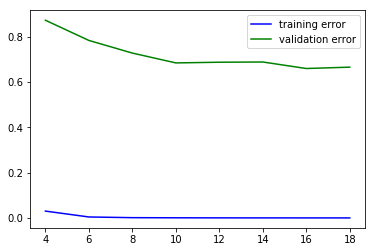

In [74]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [79]:

predictions_train_dic = {}
predictions_valid_dic = {}

for i in [100, 1, 0.1, 0.01, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0]:
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))
    

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.044794s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 100      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 51us         | NA                     |

+---------+--------------+------------------------+

| 0       | 66.484ms     | 0.603364               |

| 1       | 122.339ms    | 0.603364               |

| 2       | 170.455ms    | 0.603364               |

| 3       | 219.854ms    | 0.603364               |

| 4       | 251.514ms    | 0.603364               |

| 5       | 289.084ms    | 0.603364               |

| 6       | 331.112ms    | 0.603364               |

| 7       | 372.066ms    | 0.603364               |

| 8       | 422.992ms    | 0.603364               |

| 9       | 459.856ms    | 0.603364               |

| 10      | 508.019ms    | 0.603364               |

| 11      | 555.734ms    | 0.603364               |

| 12      | 590.134ms    | 0.603364               |

| 13      | 645.708ms    | 0.603364               |

| 14      | 677.746ms    | 0.603364               |

| 15      | 722.609ms    | 0.603364               |

| 16      | 759.575ms    | 0.603364               |

| 17      | 794.313ms    | 0.603364               |

| 18      | 834.277ms    | 0.603364               |

| 19      | 873.752ms    | 0.603364               |

| 20      | 924.484ms    | 0.603364               |

| 21      | 960.173ms    | 0.603364               |

| 22      | 1.00s        | 0.603364               |

| 23      | 1.04s        | 0.603364               |

| 24      | 1.08s        | 0.603364               |

| 25      | 1.12s        | 0.603364               |

| 26      | 1.15s        | 0.603364               |

| 27      | 1.19s        | 0.603364               |

| 28      | 1.25s        | 0.603364               |

| 29      | 1.30s        | 0.603364               |

| 30      | 1.32s        | 0.603364               |

| 31      | 1.37s        | 0.603364               |

| 32      | 1.41s        | 0.603364               |

| 33      | 1.45s        | 0.603364               |

| 34      | 1.49s        | 0.603364               |

| 35      | 1.53s        | 0.603364               |

| 36      | 1.57s        | 0.603364               |

| 37      | 1.60s        | 0.603364               |

| 38      | 1.65s        | 0.603364               |

| 39      | 1.69s        | 0.603364               |

| 40      | 1.73s        | 0.603364               |

| 41      | 1.77s        | 0.603364               |

| 42      | 1.80s        | 0.603364               |

| 43      | 1.84s        | 0.603364               |

| 44      | 1.87s        | 0.603364               |

| 45      | 1.91s        | 0.603364               |

| 46      | 1.95s        | 0.603364               |

| 47      | 1.98s        | 0.603364               |

| 48      | 2.03s        | 0.603364               |

| 49      | 2.07s        | 0.603364               |

| FINAL   | 2.07s        | 0.603364               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.049035s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 57us         | NA                     |

+---------+--------------+------------------------+

| 0       | 55.493ms     | 0.603364               |

| 1       | 106.239ms    | 0.603364               |

| 2       | 163.386ms    | 0.603364               |

| 3       | 192.005ms    | 0.603364               |

| 4       | 238.591ms    | 0.603364               |

| 5       | 278.696ms    | 0.603364               |

| 6       | 328.608ms    | 0.603364               |

| 7       | 370.77ms     | 0.603364               |

| 8       | 413.638ms    | 0.603364               |

| 9       | 438.598ms    | 0.603364               |

| 10      | 480.444ms    | 0.603364               |

| 11      | 512.196ms    | 0.603364               |

| 12      | 563.864ms    | 0.603364               |

| 13      | 603.499ms    | 0.603364               |

| 14      | 644.002ms    | 0.603364               |

| 15      | 673.464ms    | 0.603364               |

| 16      | 699.33ms     | 0.603364               |

| 17      | 728.277ms    | 0.603364               |

| 18      | 782.734ms    | 0.603364               |

| 19      | 810.697ms    | 0.603364               |

| 20      | 848.465ms    | 0.603364               |

| 21      | 895.956ms    | 0.603364               |

| 22      | 925.575ms    | 0.603364               |

| 23      | 972.573ms    | 0.603364               |

| 24      | 1.02s        | 0.603364               |

| 25      | 1.08s        | 0.603364               |

| 26      | 1.12s        | 0.603364               |

| 27      | 1.17s        | 0.603364               |

| 28      | 1.22s        | 0.603364               |

| 29      | 1.26s        | 0.603364               |

| 30      | 1.28s        | 0.603364               |

| 31      | 1.32s        | 0.603364               |

| 32      | 1.35s        | 0.603364               |

| 33      | 1.39s        | 0.603364               |

| 34      | 1.42s        | 0.603364               |

| 35      | 1.47s        | 0.603364               |

| 36      | 1.50s        | 0.603364               |

| 37      | 1.56s        | 0.603364               |

| 38      | 1.58s        | 0.603364               |

| 39      | 1.64s        | 0.603364               |

| 40      | 1.70s        | 0.603364               |

| 41      | 1.73s        | 0.603364               |

| 42      | 1.78s        | 0.603364               |

| 43      | 1.83s        | 0.603364               |

| 44      | 1.87s        | 0.603364               |

| 45      | 1.92s        | 0.603364               |

| 46      | 1.96s        | 0.603364               |

| 47      | 2.00s        | 0.603364               |

| 48      | 2.05s        | 0.603364               |

| 49      | 2.08s        | 0.603364               |

| FINAL   | 2.08s        | 0.603364               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.047321s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 62us         | NA                     |

+---------+--------------+------------------------+

| 0       | 54.176ms     | 0.603364               |

| 1       | 115.352ms    | 0.603364               |

| 2       | 164.401ms    | 0.603364               |

| 3       | 234.531ms    | 0.603364               |

| 4       | 258.169ms    | 0.603364               |

| 5       | 296.084ms    | 0.603364               |

| 6       | 337.092ms    | 0.603364               |

| 7       | 390.022ms    | 0.603364               |

| 8       | 440.484ms    | 0.603364               |

| 9       | 488.084ms    | 0.603364               |

| 10      | 524.573ms    | 0.603364               |

| 11      | 568.793ms    | 0.603364               |

| 12      | 601.982ms    | 0.603364               |

| 13      | 654.739ms    | 0.603364               |

| 14      | 685.428ms    | 0.603364               |

| 15      | 724.215ms    | 0.603364               |

| 16      | 773.477ms    | 0.603364               |

| 17      | 810.721ms    | 0.603364               |

| 18      | 852.267ms    | 0.603364               |

| 19      | 883.965ms    | 0.603364               |

| 20      | 927.194ms    | 0.603364               |

| 21      | 966.087ms    | 0.603364               |

| 22      | 1.00s        | 0.603364               |

| 23      | 1.04s        | 0.603364               |

| 24      | 1.08s        | 0.603364               |

| 25      | 1.12s        | 0.603364               |

| 26      | 1.16s        | 0.603364               |

| 27      | 1.20s        | 0.603364               |

| 28      | 1.26s        | 0.603364               |

| 29      | 1.29s        | 0.603364               |

| 30      | 1.32s        | 0.603364               |

| 31      | 1.37s        | 0.603364               |

| 32      | 1.41s        | 0.603364               |

| 33      | 1.44s        | 0.603364               |

| 34      | 1.49s        | 0.603364               |

| 35      | 1.54s        | 0.603364               |

| 36      | 1.57s        | 0.603364               |

| 37      | 1.61s        | 0.603364               |

| 38      | 1.65s        | 0.603364               |

| 39      | 1.70s        | 0.603364               |

| 40      | 1.74s        | 0.603364               |

| 41      | 1.79s        | 0.603364               |

| 42      | 1.82s        | 0.603364               |

| 43      | 1.88s        | 0.603364               |

| 44      | 1.92s        | 0.603364               |

| 45      | 1.96s        | 0.603364               |

| 46      | 1.99s        | 0.603364               |

| 47      | 2.04s        | 0.603364               |

| 48      | 2.07s        | 0.603364               |

| 49      | 2.11s        | 0.603364               |

| FINAL   | 2.11s        | 0.603364               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.055143s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.01     |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 87us         | NA                     |

+---------+--------------+------------------------+

| 0       | 59.891ms     | 0.603364               |

| 1       | 94.618ms     | 0.603364               |

| 2       | 154.188ms    | 0.603364               |

| 3       | 205.116ms    | 0.603364               |

| 4       | 243.103ms    | 0.603364               |

| 5       | 308.684ms    | 0.603364               |

| 6       | 378.684ms    | 0.603364               |

| 7       | 422.235ms    | 0.603364               |

| 8       | 449.167ms    | 0.603364               |

| 9       | 493.952ms    | 0.603364               |

| 10      | 545.639ms    | 0.603364               |

| 11      | 587.56ms     | 0.603364               |

| 12      | 630.572ms    | 0.603364               |

| 13      | 682.984ms    | 0.603364               |

| 14      | 728.077ms    | 0.603364               |

| 15      | 774.994ms    | 0.603364               |

| 16      | 810.231ms    | 0.603364               |

| 17      | 848.858ms    | 0.603364               |

| 18      | 892.122ms    | 0.603364               |

| 19      | 928.6ms      | 0.603364               |

| 20      | 970.385ms    | 0.603364               |

| 21      | 1.01s        | 0.603364               |

| 22      | 1.05s        | 0.603364               |

| 23      | 1.10s        | 0.603364               |

| 24      | 1.15s        | 0.603364               |

| 25      | 1.19s        | 0.603364               |

| 26      | 1.24s        | 0.603364               |

| 27      | 1.29s        | 0.603364               |

| 28      | 1.33s        | 0.603364               |

| 29      | 1.36s        | 0.603364               |

| 30      | 1.40s        | 0.603364               |

| 31      | 1.44s        | 0.603364               |

| 32      | 1.49s        | 0.603364               |

| 33      | 1.53s        | 0.603364               |

| 34      | 1.56s        | 0.603364               |

| 35      | 1.60s        | 0.603364               |

| 36      | 1.65s        | 0.603364               |

| 37      | 1.69s        | 0.603364               |

| 38      | 1.73s        | 0.603364               |

| 39      | 1.78s        | 0.603364               |

| 40      | 1.82s        | 0.603364               |

| 41      | 1.87s        | 0.603364               |

| 42      | 1.91s        | 0.603364               |

| 43      | 1.94s        | 0.603364               |

| 44      | 1.99s        | 0.603364               |

| 45      | 2.02s        | 0.603364               |

| 46      | 2.06s        | 0.603364               |

| 47      | 2.11s        | 0.603364               |

| 48      | 2.15s        | 0.603364               |

| 49      | 2.18s        | 0.603364               |

| FINAL   | 2.18s        | 0.603364               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.051448s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.0001   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 102us        | NA                     |

+---------+--------------+------------------------+

| 0       | 52.266ms     | 0.603359               |

| 1       | 90.207ms     | 0.601761               |

| 2       | 138.078ms    | 0.52262                |

| 3       | 177.558ms    | 0.428614               |

| 4       | 214.955ms    | 0.37387                |

| 5       | 253.265ms    | 0.346296               |

| 6       | 313.608ms    | 0.330237               |

| 7       | 361.554ms    | 0.322502               |

| 8       | 408.643ms    | 0.318975               |

| 9       | 457.931ms    | 0.317118               |

| 10      | 489.168ms    | 0.316011               |

| 11      | 526.192ms    | 0.31525                |

| 12      | 575.958ms    | 0.314696               |

| 13      | 630.598ms    | 0.314286               |

| 14      | 675.412ms    | 0.313977               |

| 15      | 725.213ms    | 0.313738               |

| 16      | 769.818ms    | 0.313545               |

| 17      | 811.481ms    | 0.313385               |

| 18      | 851.614ms    | 0.313249               |

| 19      | 898.571ms    | 0.313133               |

| 20      | 948.203ms    | 0.313031               |

| 21      | 992.185ms    | 0.31294                |

| 22      | 1.03s        | 0.31286                |

| 23      | 1.06s        | 0.312787               |

| 24      | 1.13s        | 0.312722               |

| 25      | 1.16s        | 0.312662               |

| 26      | 1.20s        | 0.312607               |

| 27      | 1.25s        | 0.312557               |

| 28      | 1.30s        | 0.312511               |

| 29      | 1.35s        | 0.312468               |

| 30      | 1.38s        | 0.312428               |

| 31      | 1.43s        | 0.312391               |

| 32      | 1.47s        | 0.312356               |

| 33      | 1.51s        | 0.312324               |

| 34      | 1.55s        | 0.312293               |

| 35      | 1.59s        | 0.312264               |

| 36      | 1.65s        | 0.312236               |

| 37      | 1.68s        | 0.31221                |

| 38      | 1.74s        | 0.312186               |

| 39      | 1.79s        | 0.312162               |

| 40      | 1.83s        | 0.31214                |

| 41      | 1.87s        | 0.312119               |

| 42      | 1.92s        | 0.312098               |

| 43      | 1.96s        | 0.312079               |

| 44      | 2.01s        | 0.31206                |

| 45      | 2.05s        | 0.312043               |

| 46      | 2.11s        | 0.312026               |

| 47      | 2.15s        | 0.312009               |

| 48      | 2.19s        | 0.311993               |

| 49      | 2.23s        | 0.311978               |

| FINAL   | 2.23s        | 0.311978               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.05132s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-05    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 48us         | NA                     |

+---------+--------------+------------------------+

| 0       | 61.767ms     | 0.598621               |

| 1       | 112.668ms    | 0.124403               |

| 2       | 143.919ms    | 0.0491857              |

| 3       | 187.601ms    | 0.0444979              |

| 4       | 226.71ms     | 0.0433659              |

| 5       | 278.293ms    | 0.0429958              |

| 6       | 325.961ms    | 0.0429178              |

| 7       | 370.459ms    | 0.042969               |

| 8       | 402.111ms    | 0.0430804              |

| 9       | 447.495ms    | 0.0432121              |

| 10      | 499.904ms    | 0.0433438              |

| 11      | 538.15ms     | 0.043469               |

| 12      | 585.761ms    | 0.0435844              |

| 13      | 611.265ms    | 0.0436869              |

| 14      | 655.267ms    | 0.0437754              |

| 15      | 701.51ms     | 0.0438503              |

| 16      | 745.338ms    | 0.043913               |

| 17      | 771.615ms    | 0.0439653              |

| 18      | 819.493ms    | 0.0440086              |

| 19      | 857.53ms     | 0.0440443              |

| 20      | 897.794ms    | 0.0440735              |

| 21      | 955.07ms     | 0.0440974              |

| 22      | 999.97ms     | 0.0441168              |

| 23      | 1.02s        | 0.0441323              |

| 24      | 1.07s        | 0.0441447              |

| 25      | 1.12s        | 0.0441543              |

| 26      | 1.16s        | 0.0441617              |

| 27      | 1.21s        | 0.0441672              |

| 28      | 1.27s        | 0.0441712              |

| 29      | 1.30s        | 0.044174               |

| 30      | 1.35s        | 0.0441757              |

| 31      | 1.40s        | 0.0441767              |

| 32      | 1.44s        | 0.0441769              |

| 33      | 1.48s        | 0.0441766              |

| 34      | 1.51s        | 0.0441758              |

| 35      | 1.55s        | 0.0441747              |

| 36      | 1.58s        | 0.0441732              |

| 37      | 1.62s        | 0.0441716              |

| 38      | 1.67s        | 0.0441697              |

| 39      | 1.72s        | 0.0441676              |

| 40      | 1.76s        | 0.0441654              |

| 41      | 1.79s        | 0.0441632              |

| 42      | 1.82s        | 0.0441608              |

| 43      | 1.86s        | 0.0441584              |

| 44      | 1.91s        | 0.044156               |

| 45      | 1.94s        | 0.0441535              |

| 46      | 2.00s        | 0.0441511              |

| 47      | 2.05s        | 0.0441486              |

| 48      | 2.10s        | 0.0441461              |

| 49      | 2.15s        | 0.0441437              |

| FINAL   | 2.15s        | 0.0441437              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.048331s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-06    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 97us         | NA                     |

+---------+--------------+------------------------+

| 0       | 68.671ms     | 0.264583               |

| 1       | 112.945ms    | 0.0746762              |

| 2       | 147.1ms      | 0.0552346              |

| 3       | 178.321ms    | 0.0446809              |

| 4       | 219.527ms    | 0.0378485              |

| 5       | 268.67ms     | 0.0329928              |

| 6       | 310.31ms     | 0.0293361              |

| 7       | 353.249ms    | 0.0264702              |

| 8       | 401.979ms    | 0.0241574              |

| 9       | 433.524ms    | 0.02225                |

| 10      | 472.178ms    | 0.0206483              |

| 11      | 494.553ms    | 0.0192828              |

| 12      | 536.367ms    | 0.0181043              |

| 13      | 572.846ms    | 0.0170763              |

| 14      | 607.502ms    | 0.0161716              |

| 15      | 658.841ms    | 0.015369               |

| 16      | 711.735ms    | 0.0146519              |

| 17      | 751.406ms    | 0.0140072              |

| 18      | 797.209ms    | 0.0134244              |

| 19      | 841.473ms    | 0.0128946              |

| 20      | 879.674ms    | 0.0124108              |

| 21      | 926.162ms    | 0.0119668              |

| 22      | 954.743ms    | 0.0115576              |

| 23      | 1.00s        | 0.0111791              |

| 24      | 1.04s        | 0.0108281              |

| 25      | 1.08s        | 0.0105026              |

| 26      | 1.11s        | 0.0102017              |

| 27      | 1.15s        | 0.00992421             |

| 28      | 1.21s        | 0.0096683              |

| 29      | 1.24s        | 0.00943133             |

| 30      | 1.26s        | 0.00921089             |

| 31      | 1.31s        | 0.00900491             |

| 32      | 1.35s        | 0.00881202             |

| 33      | 1.40s        | 0.00863093             |

| 34      | 1.43s        | 0.0084607              |

| 35      | 1.47s        | 0.00830037             |

| 36      | 1.51s        | 0.00814927             |

| 37      | 1.55s        | 0.00800656             |

| 38      | 1.58s        | 0.00787177             |

| 39      | 1.61s        | 0.0077442              |

| 40      | 1.65s        | 0.00762335             |

| 41      | 1.69s        | 0.00750881             |

| 42      | 1.73s        | 0.00740011             |

| 43      | 1.77s        | 0.00729685             |

| 44      | 1.81s        | 0.00719869             |

| 45      | 1.84s        | 0.00710526             |

| 46      | 1.86s        | 0.00701628             |

| 47      | 1.91s        | 0.00693145             |

| 48      | 1.95s        | 0.00685056             |

| 49      | 1.99s        | 0.00677334             |

| FINAL   | 1.99s        | 0.00677334             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.052339s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-07    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 103us        | NA                     |

+---------+--------------+------------------------+

| 0       | 56.824ms     | 0.161766               |

| 1       | 90.585ms     | 0.00764266             |

| 2       | 146.327ms    | 0.00518569             |

| 3       | 185.965ms    | 0.00399349             |

| 4       | 238.29ms     | 0.00333289             |

| 5       | 270.553ms    | 0.00292384             |

| 6       | 312.222ms    | 0.00264308             |

| 7       | 341.606ms    | 0.00243584             |

| 8       | 393.778ms    | 0.00227526             |

| 9       | 444.23ms     | 0.00214681             |

| 10      | 495.559ms    | 0.0020409              |

| 11      | 532.923ms    | 0.00195134             |

| 12      | 564.961ms    | 0.00187408             |

| 13      | 618.323ms    | 0.00180634             |

| 14      | 687.586ms    | 0.0017463              |

| 15      | 752.011ms    | 0.00169252             |

| 16      | 809.034ms    | 0.00164388             |

| 17      | 840.511ms    | 0.00159954             |

| 18      | 894.268ms    | 0.00155892             |

| 19      | 923.106ms    | 0.00152143             |

| 20      | 986.656ms    | 0.00148671             |

| 21      | 1.02s        | 0.00145441             |

| 22      | 1.06s        | 0.0014243              |

| 23      | 1.11s        | 0.00139612             |

| 24      | 1.14s        | 0.00136967             |

| 25      | 1.18s        | 0.00134474             |

| 26      | 1.21s        | 0.00132117             |

| 27      | 1.24s        | 0.00129877             |

| 28      | 1.30s        | 0.00127746             |

| 29      | 1.33s        | 0.00125723             |

| 30      | 1.37s        | 0.00123802             |

| 31      | 1.42s        | 0.00121982             |

| 32      | 1.46s        | 0.00120246             |

| 33      | 1.52s        | 0.00118592             |

| 34      | 1.55s        | 0.00117011             |

| 35      | 1.58s        | 0.00115499             |

| 36      | 1.62s        | 0.00114048             |

| 37      | 1.67s        | 0.00112658             |

| 38      | 1.72s        | 0.0011132              |

| 39      | 1.76s        | 0.00110033             |

| 40      | 1.80s        | 0.00108794             |

| 41      | 1.84s        | 0.00107598             |

| 42      | 1.87s        | 0.00106446             |

| 43      | 1.92s        | 0.00105332             |

| 44      | 1.96s        | 0.00104257             |

| 45      | 2.00s        | 0.00103217             |

| 46      | 2.05s        | 0.0010221              |

| 47      | 2.10s        | 0.00101236             |

| 48      | 2.16s        | 0.00100291             |

| 49      | 2.19s        | 0.000993747            |

| FINAL   | 2.19s        | 0.000993747            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.054919s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 67us         | NA                     |

+---------+--------------+------------------------+

| 0       | 49.236ms     | 0.160725               |

| 1       | 94.587ms     | 0.00729396             |

| 2       | 118.114ms    | 0.00517558             |

| 3       | 162.96ms     | 0.00414834             |

| 4       | 211.891ms    | 0.00351466             |

| 5       | 258.863ms    | 0.00306943             |

| 6       | 312.501ms    | 0.00273573             |

| 7       | 350.208ms    | 0.00247353             |

| 8       | 378.93ms     | 0.0022624              |

| 9       | 431.062ms    | 0.00208881             |

| 10      | 480.942ms    | 0.00194466             |

| 11      | 517.284ms    | 0.00182349             |

| 12      | 569.331ms    | 0.0017214              |

| 13      | 600.1ms      | 0.00163384             |

| 14      | 651.833ms    | 0.00155815             |

| 15      | 692.514ms    | 0.00149338             |

| 16      | 748.195ms    | 0.00143656             |

| 17      | 789.897ms    | 0.00138616             |

| 18      | 832.614ms    | 0.00134151             |

| 19      | 876.4ms      | 0.00130125             |

| 20      | 931.46ms     | 0.00126472             |

| 21      | 962.847ms    | 0.00123101             |

| 22      | 1.00s        | 0.00120023             |

| 23      | 1.04s        | 0.00117167             |

| 24      | 1.09s        | 0.00114474             |

| 25      | 1.13s        | 0.00111971             |

| 26      | 1.18s        | 0.00109613             |

| 27      | 1.23s        | 0.00107364             |

| 28      | 1.26s        | 0.0010524              |

| 29      | 1.31s        | 0.00103211             |

| 30      | 1.36s        | 0.00101272             |

| 31      | 1.38s        | 0.000994402            |

| 32      | 1.43s        | 0.000976714            |

| 33      | 1.47s        | 0.00095984             |

| 34      | 1.52s        | 0.000943491            |

| 35      | 1.56s        | 0.000927641            |

| 36      | 1.62s        | 0.000912613            |

| 37      | 1.66s        | 0.000898049            |

| 38      | 1.71s        | 0.000884014            |

| 39      | 1.75s        | 0.000870358            |

| 40      | 1.78s        | 0.000857083            |

| 41      | 1.82s        | 0.000844331            |

| 42      | 1.88s        | 0.000832096            |

| 43      | 1.93s        | 0.000820131            |

| 44      | 1.98s        | 0.000808455            |

| 45      | 2.01s        | 0.000797168            |

| 46      | 2.06s        | 0.000786173            |

| 47      | 2.09s        | 0.00077556             |

| 48      | 2.12s        | 0.000765213            |

| 49      | 2.16s        | 0.000755196            |

| FINAL   | 2.16s        | 0.000755196            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.047923s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 61us         | NA                     |

+---------+--------------+------------------------+

| 0       | 61.217ms     | 0.0794743              |

| 1       | 116.633ms    | 0.0289752              |

| 2       | 147.576ms    | 0.0192774              |

| 3       | 181.496ms    | 0.0145351              |

| 4       | 223.254ms    | 0.0117131              |

| 5       | 261.78ms     | 0.00979097             |

| 6       | 312.314ms    | 0.00843022             |

| 7       | 368.471ms    | 0.00741833             |

| 8       | 400.332ms    | 0.00662993             |

| 9       | 445.942ms    | 0.00598799             |

| 10      | 483.571ms    | 0.00632673             |

| 11      | 520.376ms    | 0.00790405             |

| 12      | 573.959ms    | 0.00564025             |

| 13      | 623.886ms    | 0.00561751             |

| 14      | 650.325ms    | 0.0073142              |

| 15      | 689.865ms    | 0.0143345              |

| 16      | 742.122ms    | 0.015192               |

| 17      | 777.578ms    | 0.0257023              |

| 18      | 818.661ms    | 0.0249943              |

| 19      | 851.78ms     | 0.0154389              |

| 20      | 903.316ms    | 0.00917835             |

| 21      | 930.498ms    | 0.00813532             |

| 22      | 988.935ms    | 0.0313455              |

| 23      | 1.04s        | 0.0247007              |

| 24      | 1.07s        | 0.0224703              |

| 25      | 1.11s        | 0.0277002              |

| 26      | 1.15s        | 0.0255676              |

| 27      | 1.20s        | 0.0225514              |

| 28      | 1.23s        | 0.0191166              |

| 29      | 1.28s        | 0.01897                |

| 30      | 1.32s        | 0.0385141              |

| 31      | 1.37s        | 0.0287561              |

| 32      | 1.41s        | 0.0396953              |

| 33      | 1.45s        | 0.0408771              |

| 34      | 1.49s        | 0.0400098              |

| 35      | 1.54s        | 0.0414725              |

| 36      | 1.59s        | 0.0419899              |

| 37      | 1.63s        | 0.202957               |

| 38      | 1.68s        | 0.0472917              |

| 39      | 1.72s        | 0.044624               |

| 40      | 1.77s        | 0.0448655              |

| 41      | 1.81s        | 0.0451039              |

| 42      | 1.86s        | 0.0446852              |

| 43      | 1.90s        | 0.0451576              |

| 44      | 1.93s        | 0.0487619              |

| 45      | 1.97s        | 0.0554036              |

| 46      | 2.03s        | 0.0511802              |

| 47      | 2.07s        | 0.0475205              |

| 48      | 2.10s        | 0.0456723              |

| 49      | 2.15s        | 0.0566595              |

| FINAL   | 2.15s        | 0.0566595              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

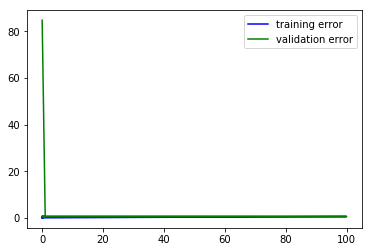

In [80]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [81]:
predictions_train_dic

{0: 0.056659468774325143,
 1e-08: 0.00075519559174910854,
 1e-07: 0.0009937474687785621,
 1e-06: 0.0067733386626180675,
 1e-05: 0.044143697383411944,
 0.0001: 0.31197841957888073,
 0.01: 0.60336365417370175,
 0.1: 0.60336365417370175,
 1: 0.60336365417370175,
 100: 0.60336365417370175}

In [82]:
predictions_valid_dic

{0: 84.761352083084887,
 1e-08: 0.67934911532128039,
 1e-07: 0.66185357959643032,
 1e-06: 0.67640445799141491,
 1e-05: 0.62748768384159548,
 0.0001: 0.59008933109015393,
 0.01: 0.59895196244260707,
 0.1: 0.59895196244260707,
 1: 0.59895196244260707,
 100: 0.59895196244260707}

In [84]:
model = model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=0.1)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 886 items.

Data prepared in: 0.045167s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 68us         | NA                     |

+---------+--------------+------------------------+

| 0       | 58.9ms       | 0.603364               |

| 1       | 116.483ms    | 0.603364               |

| 2       | 171.001ms    | 0.603364               |

| 3       | 249.74ms     | 0.603364               |

| 4       | 292.658ms    | 0.603364               |

| 5       | 323.229ms    | 0.603364               |

| 6       | 374.737ms    | 0.603364               |

| 7       | 427.451ms    | 0.603364               |

| 8       | 453.784ms    | 0.603364               |

| 9       | 503.522ms    | 0.603364               |

| 10      | 543.958ms    | 0.603364               |

| 11      | 593.993ms    | 0.603364               |

| 12      | 629.455ms    | 0.603364               |

| 13      | 668.056ms    | 0.603364               |

| 14      | 704.156ms    | 0.603364               |

| 15      | 754.296ms    | 0.603364               |

| 16      | 784.982ms    | 0.603364               |

| 17      | 828.858ms    | 0.603364               |

| 18      | 865.08ms     | 0.603364               |

| 19      | 896.32ms     | 0.603364               |

| 20      | 936.539ms    | 0.603364               |

| 21      | 977.481ms    | 0.603364               |

| 22      | 1.02s        | 0.603364               |

| 23      | 1.07s        | 0.603364               |

| 24      | 1.10s        | 0.603364               |

| 25      | 1.15s        | 0.603364               |

| 26      | 1.20s        | 0.603364               |

| 27      | 1.25s        | 0.603364               |

| 28      | 1.28s        | 0.603364               |

| 29      | 1.32s        | 0.603364               |

| 30      | 1.35s        | 0.603364               |

| 31      | 1.40s        | 0.603364               |

| 32      | 1.43s        | 0.603364               |

| 33      | 1.48s        | 0.603364               |

| 34      | 1.53s        | 0.603364               |

| 35      | 1.56s        | 0.603364               |

| 36      | 1.61s        | 0.603364               |

| 37      | 1.66s        | 0.603364               |

| 38      | 1.70s        | 0.603364               |

| 39      | 1.75s        | 0.603364               |

| 40      | 1.79s        | 0.603364               |

| 41      | 1.84s        | 0.603364               |

| 42      | 1.89s        | 0.603364               |

| 43      | 1.93s        | 0.603364               |

| 44      | 1.95s        | 0.603364               |

| 45      | 2.00s        | 0.603364               |

| 46      | 2.04s        | 0.603364               |

| 47      | 2.09s        | 0.603364               |

| 48      | 2.12s        | 0.603364               |

| 49      | 2.16s        | 0.603364               |

| FINAL   | 2.16s        | 0.603364               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [85]:
predictions_test = model.predict(sf_test)
rmse = np.sqrt(mean_squared_error(sf_test['rating'], predictions_test))

In [86]:
print "test set rmse: ", rmse

test set rmse:  0.610682911218


### Single value decomposition

In [87]:
train_df_matrix = np.zeros((n_users, n_items))
for line in train_df.itertuples():
    train_df_matrix[line[2]-1, line[1]-1] = line[3]

In [88]:
validation_df_matrix = np.zeros((n_users, n_items))
for line in validate_df.itertuples():
    validation_df_matrix[line[2]-1, line[1]-1] = line[3]

In [89]:
test_df_matrix = np.zeros((n_users, n_items))
for line in test_df.itertuples():
    test_df_matrix[line[2]-1, line[1]-1] = line[3]

In [90]:
u, s, vt = svds(train_df_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [91]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [93]:
print('User-based CF MSE: ' + str(rmse(X_pred, test_df_matrix)))

User-based CF MSE: 4.70144464693


In [96]:
predictions_train_svd = {}
predictions_valid_svd = {}
for i in xrange(2, 22, 2):
    u, s, vt = svds(train_df_matrix, k = i)
    s_diag_matrix=np.diag(s)
    X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
    predictions_train_svd[i] = rmse(X_pred, train_df_matrix)
    predictions_valid_svd[i] = rmse(X_pred, validation_df_matrix)

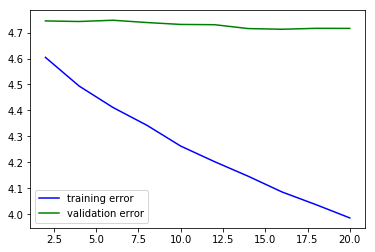

In [97]:
plt.plot(predictions_train_svd.keys(), predictions_train_svd.values(), color = "b", label = "training error")
plt.plot(predictions_valid_svd.keys(), predictions_valid_svd.values(), color = "g", label = "validation error")
plt.legend()

In [98]:
u, s, vt = svds(train_df_matrix, k = 4)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [99]:
print('User-based CF MSE: ' + str(rmse(X_pred, test_df_matrix)))

User-based CF MSE: 4.73901831329
